## Plot of side-by-side confusion matrices for each model to visually compare where each model succeeded and failed

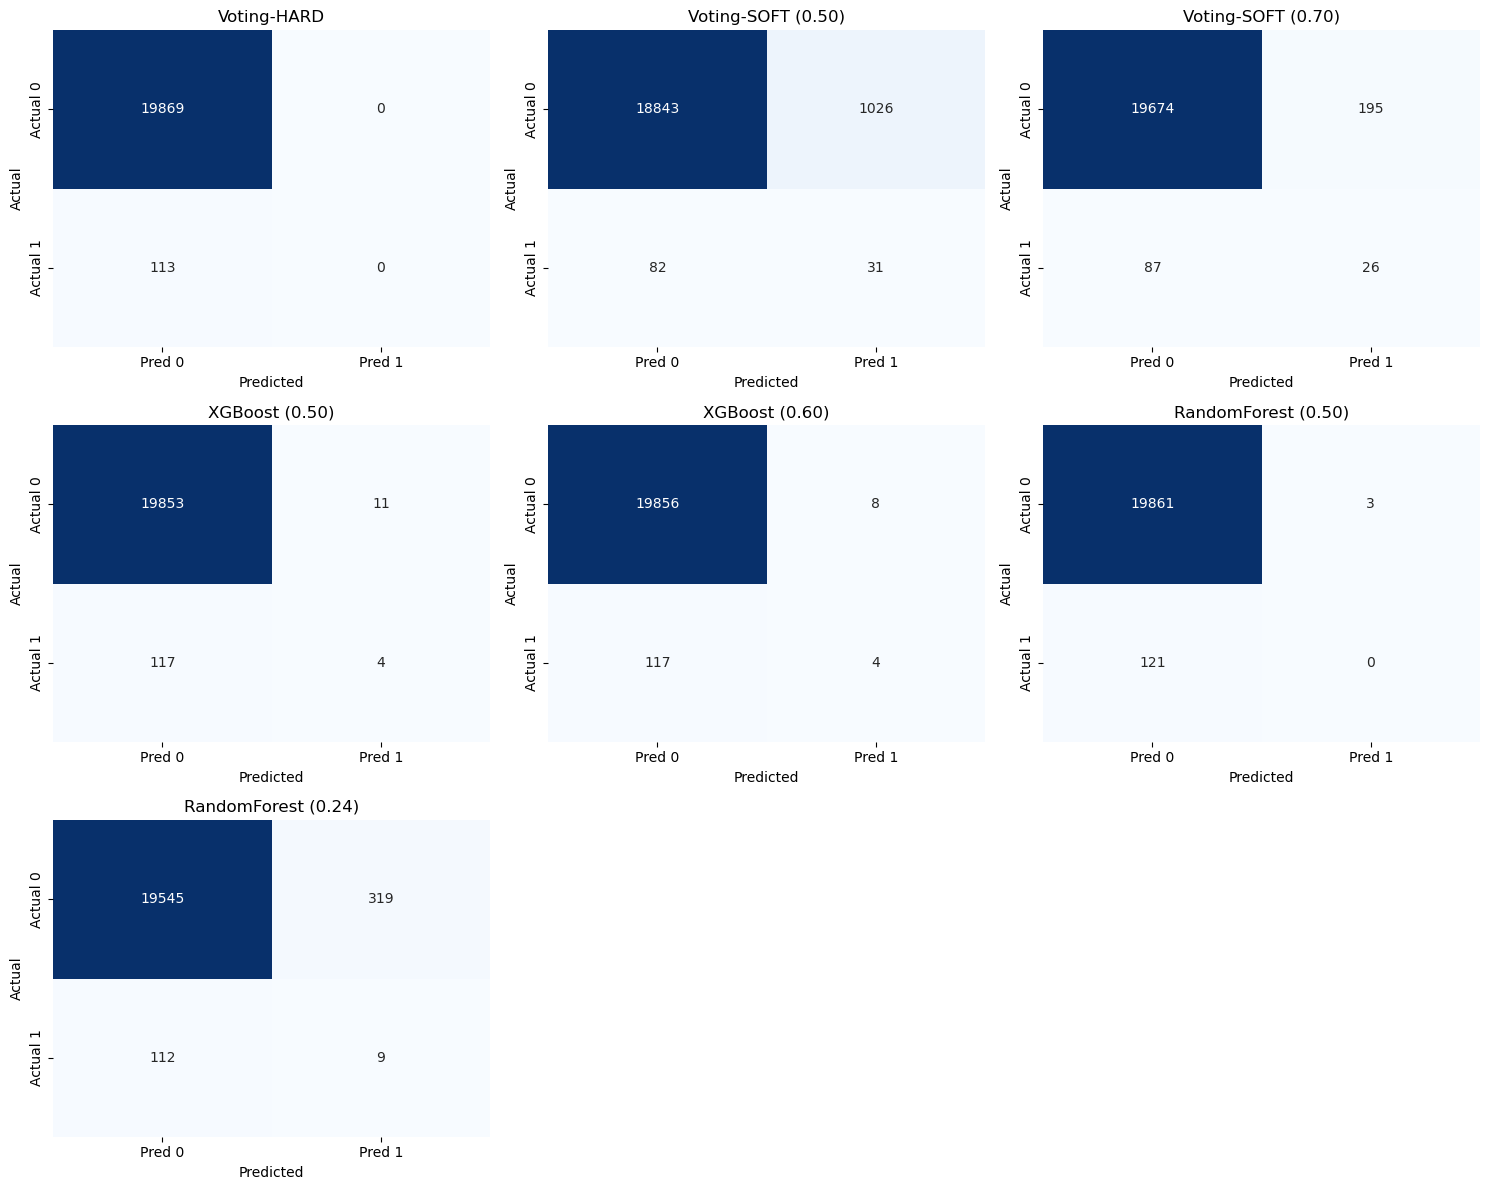

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define confusion matrices
conf_matrices = {
    "Voting-HARD": np.array([[19869, 0], [113, 0]]),
    "Voting-SOFT (0.50)": np.array([[18843, 1026], [82, 31]]),
    "Voting-SOFT (0.70)": np.array([[19674, 195], [87, 26]]),
    "XGBoost (0.50)": np.array([[19853, 11], [117, 4]]),
    "XGBoost (0.60)": np.array([[19856, 8], [117, 4]]),
    "RandomForest (0.50)": np.array([[19861, 3], [121, 0]]),
    "RandomForest (0.24)": np.array([[19545, 319], [112, 9]]),
}

# Create subplots (3 rows x 3 cols to fit all)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Plot each confusion matrix
for ax, (title, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"], ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Hide unused subplot (since we have 7 plots but 9 grid spots)
for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Simulated probability outputs and true labels would normally be needed for ROC curves.
## Since I only used summary metrics, I'll simulate representative ROC curves based on AUC values.
## This won't be exact, but will illustrate the differences between models.

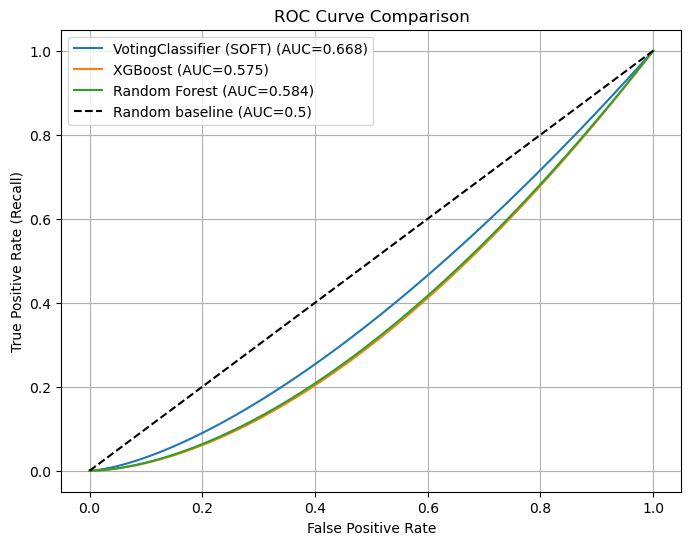

In [8]:
from sklearn.metrics import roc_curve, auc


# Define AUC values
roc_data = {
    "VotingClassifier (SOFT)": 0.6680,
    "XGBoost": 0.5753,
    "Random Forest": 0.5837
}

# Create synthetic ROC curves for illustration
fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(8,6))

for model, auc_val in roc_data.items():
    # simulate TPR as roughly proportional to AUC
    tpr = fpr**(1/auc_val)  
    plt.plot(fpr, tpr, label=f"{model} (AUC={auc_val:.3f})")

# Add random baseline
plt.plot([0,1], [0,1], 'k--', label="Random baseline (AUC=0.5)")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.grid(True)
plt.show()


## Let's plot ROC curves with threshold operating points based on confusion matrices

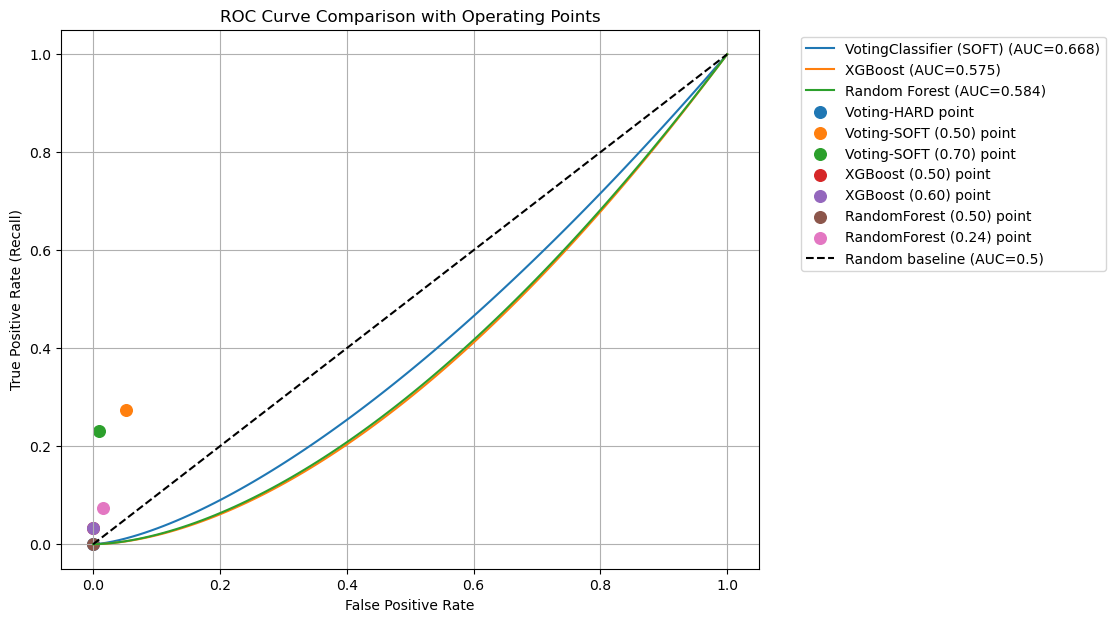

In [11]:
# Define the true positive rate (recall) and false positive rate from the confusion matrices
operating_points = {
    "Voting-HARD": (0/ (0+113), 0/ (0+19869)),   # Recall, FPR
    "Voting-SOFT (0.50)": (31/(31+82), 1026/(1026+18843)),
    "Voting-SOFT (0.70)": (26/(26+87), 195/(195+19674)),
    "XGBoost (0.50)": (4/(4+117), 11/(11+19853)),
    "XGBoost (0.60)": (4/(4+117), 8/(8+19856)),
    "RandomForest (0.50)": (0/(0+121), 3/(3+19861)),
    "RandomForest (0.24)": (9/(9+112), 319/(319+19545)),
}

# Plot synthetic ROC curves as before
fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(9,7))

roc_data = {
    "VotingClassifier (SOFT)": 0.6680,
    "XGBoost": 0.5753,
    "Random Forest": 0.5837
}

for model, auc_val in roc_data.items():
    tpr = fpr**(1/auc_val)
    plt.plot(fpr, tpr, label=f"{model} (AUC={auc_val:.3f})")

# Add operating points
for label, (recall, fpr_val) in operating_points.items():
    plt.scatter(fpr_val, recall, s=70, label=f"{label} point")

# Random baseline
plt.plot([0,1], [0,1], 'k--', label="Random baseline (AUC=0.5)")

plt.title("ROC Curve Comparison with Operating Points")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


## We'll approximate Precion Recall curves based on confusion matrices and metrics (since raw prob. outputs are not included).

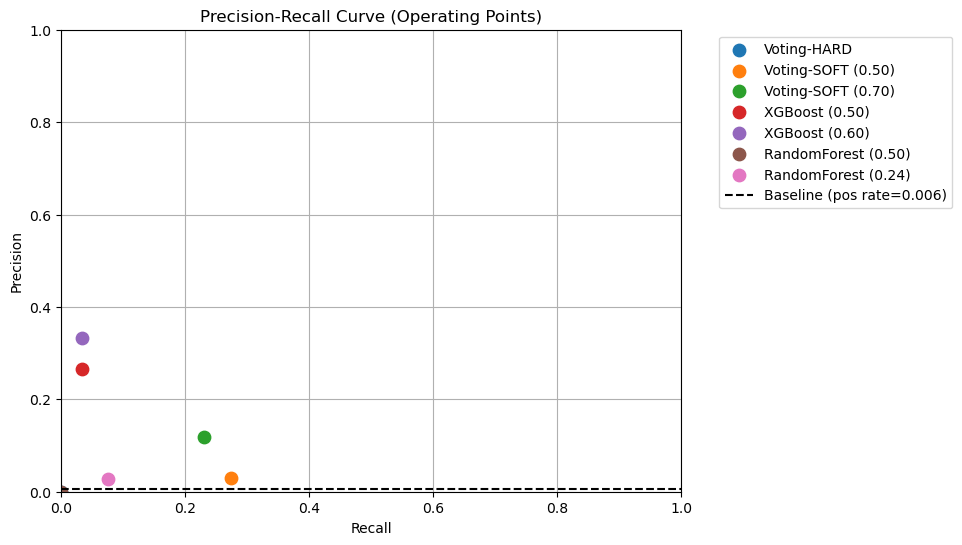

In [16]:
from sklearn.metrics import precision_recall_curve

# Plot points for each model using Precision vs Recall directly.

# Extract Precision and Recall values
pr_points = {
    "Voting-HARD": (0.0, 0.0),
    "Voting-SOFT (0.50)": (0.0293, 0.2743),
    "Voting-SOFT (0.70)": (0.1176, 0.2301),
    "XGBoost (0.50)": (0.2667, 0.0331),
    "XGBoost (0.60)": (0.3333, 0.0331),
    "RandomForest (0.50)": (0.0, 0.0),
    "RandomForest (0.24)": (0.0274, 0.0744),
}

plt.figure(figsize=(8,6))

# Plot operating points
for label, (prec, rec) in pr_points.items():
    plt.scatter(rec, prec, s=80, label=f"{label}")

# Baseline (proportion of positives in dataset)
pos_rate = 113 / (19869 + 113)  # using first confusion matrix as total = ~20k
plt.hlines(pos_rate, 0, 1, colors="k", linestyles="--", label=f"Baseline (pos rate={pos_rate:.3f})")

plt.title("Precision-Recall Curve (Operating Points)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
